Класс двумерного сверточного слоя `Conv2D`.

In [ ]:
Conv2D(
    filters,                            # количество фильтров (выходных каналов)
    kernel_size,                        # размер матриц ядер

    strides=(1, 1),                     # шаг свёртки
    padding="valid",                    # расширение матрицы изображения
    data_format=None,                   # положение оси канала в форме изображения
    dilation_rate=(1, 1),               # разрежение свёртки
    groups=1,                           # количество параллельных групп свёрток
    activation=None,                    # функция активации
    use_bias=True,                      # наличие bias
    kernel_initializer="glorot_uniform",# инициализатор весов ядра
    bias_initializer="zeros",           # инициализатор весов bias
    kernel_regularizer=None,            # регуляризация ядра
    bias_regularizer=None,              # регуляризация bias
    activity_regularizer=None,          # регуляризация выхода слоя
    kernel_constraint=None,             # ограничения весов ядра
    bias_constraint=None,               # ограничения весов bias
    **kwargs,
)

Cлой `tf.keras.layers.Conv2D` создает ядра свёртки, которые сворачиваются с входным тензором для создания тензора выходных данных. Если `use_bias` имеет значение `True`, создается вектор смещения, который добавляется к выходным данным после свёртки. Наконец, если функция активации не равна `None`, она применяется к выходу.

При использовании этого слоя в качестве первого в модели укажите аргумент ключевого слова input_shape (кортеж целых чисел или `None`), например `input_shape = (128, 128, 3)` для цветных изображений 128x128 RGB в `data_format = "channels_last"`. Можно использовать `None`, если размер переменный.

### Форма входных данных

4D-тензор формы `batch_shape + (channels, rows, cols)`, если  `data_format='channels_first'`<br>
4D-тензор формы `batch_shape + (rows, cols, channels)`, если  `data_format='channels_last'`

### Форма выходных данных

4D-тензор формы  `batch_shape + (filters, new_rows, new_cols)`, если `data_format='channels_first'`<br>
4D-тензор формы `batch_shape + (new_rows, new_cols, filters)`, если  `data_format='channels_last'`


### Замечание

Для инициализации весов параметр `input_shape` является обязательным, если в модели не задан входной слой и модель не вызывалась с аргументом.



# Аргументы

### `filters`

Тип: `int`.

Описание: размер канального выходного пространства (количество каналов).

Примеры:<br>
• `filters` = 3 – на выходе 3 канала<br>
• `filters` = 32 – на выходе 32 канала.

## `kernel_size`

Тип: целое число `int` или (`int`, `int`).

Описание: Указание высоты и ширины окна двумерной свёртки. Может быть одним целым числом, чтобы указать одно и то же значение для всех пространственных измерений. Размер указывается сразу для всех ядер свёртки слоя.

Примеры:<br>
• `kernel_size = 3` – ядро свёртки 3х3; <br>
• `kernel_size = (3, 3)` – ядро свёртки 3х3;<br>
• `kernel_size = (2, 5)` – ядро свёртки 2х5.

# Ключевые слова

## `input_shape`

Тип: `tuple` или `list`. <br>
Описание: задание формы входного 4D-тензора (без задания размера батча).

Примеры:<br>
• `input_shape = (224, 224, 3)` – изображение размера 224х224 с 3-мя каналами ("цветное"); <br>
• `input_shape = (28, 28, 1)` – изображение размера 28х28 с 1-м каналом ("чёрно-белое"); <br>
• `input_shape = (2, 256, 256)` – изображение размера 256х256 с 2-мя каналами (при параметре `data_format=channels_first`);<br>
• `input_shape = (None, None, 3)` – изображение любой ширины и высоты с 3-мя каналами.

## `data_format`

Значения: `'channels_last'` (по умолчанию) или `'channels_first'`.

Описание: Положение канала в форме входных данных. `channels_last` соответствует форме `(batch_size, height, width, channels)` (NHWC), а `'channels_first'` – `(batch_size, channels, height, width)` (NCHW). <br>
По умолчанию используется значение `image_data_format`, которое находится в вашем конфигурационном файле Keras по адресу `~/.keras/keras.json`. Значение умолчанию `None` соответствует `'channels_last'`.

Варианты:<br>
• `data_format = 'channels_last'` – вход имеет форму NHWC <br>
• `data_format = 'channels_first'` – вход имеет форму NCHW (может не работать с CPU).<br>
Здесь N – количество объектов в батче,<br>
C – количество каналов изображений,<br>
HW – высота и ширина изображений.

## `padding`

Значения: `'valid'` или `'same'`.

Описание: расширение матрицы изображения путем добавления дополнительных нулей по краям. `'valid'` означает отсутствие заполнения. `'same'` приводит к заполнению нулями справа/слева и внизу/вверху матрицы на входе.

При `padding = 'same'` заполнение нулями осуществляется **в первую очередь снизу и справа**. Заполнение нулями **сверху и слева происходит по остаточному принципу** и зависит от других параметров (`strides`, `input_shape`, `kernel_size` (в слое свёртки), `pooling_size` (в слое пулинга)).

#### Демонстрация

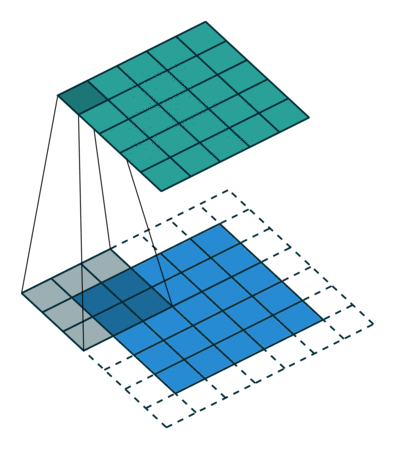

*Демонстрация `padding='same'`*

## `strides`

Тип: целое число `int` или (`int`, `int`).

Описание: определяет шаги свёртки по высоте и ширине. Может быть одним целым числом, чтобы указать одно и то же значение для всех пространственных измерений. Указание любого значения `stride` > 1 несовместимо с указанием любого значения `dilation_rate` > 1.

#### Демонстрация

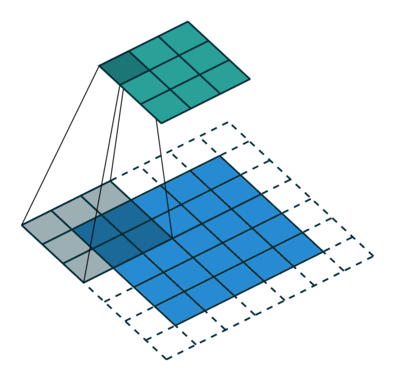

*Демонстрация `stride=(2, 2)`.*

## `dilation_rate`

Тип: `int` или (`int`, `int`).

Описание: велечина расширенной свёртки. Может быть одним целым числом, чтобы указать одно и то же значение для всех пространственных измерений.

#### Демонстрация

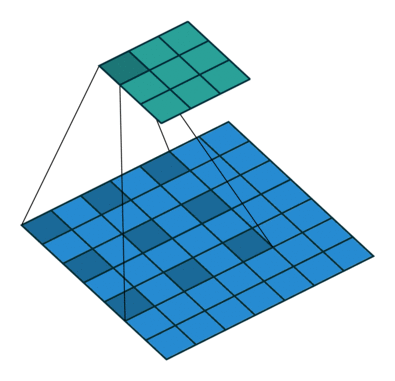

*Демонстрация расширенной свёртки с `dilation_rate=(2, 2)`*.

## `use_bias`

Тип: `bool`.

Описание: Если `use_bias='True'`, то у каждого ядра появляется свой свободный коэффециент. Bias прибавляется к результату перемножения

#### Демонстрация

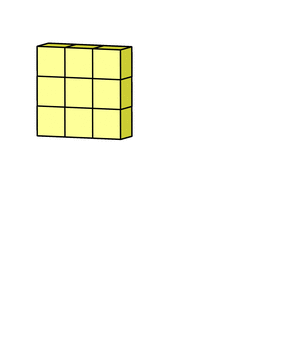

*Демонстрация использования bias.*

## `groups`

Тип: `int` > 0.

Описание: число `groups` определяет количество групп, на которые вход разделяется по оси канала. Каждая группа сворачивается отдельно с фильтрами / фильтрами групп. Результатом является объединение результатов всех групп по оси канала. Входные каналы и фильтры на несвязные между собой группы. Число фильтров и число каналов должно быть кратно числу групп. <br>

Примеры:<br>
• `groups=1` – одна группа (значение по умолчанию). Любое количество каналов и фильтров;<br>
• `groups=2` – две группы. Подойдет количество каналов: 2, 4, 6 и т. д.. Подойдет количество фильтров: 2, 4, 6 и т. д..;<br>
• `groups=5` – пять групп. Подойдет количество каналов и фильтров: 5, 10, 15 и т. д..

#### Обобщение

Пусть $Z^+ = \{1, 2, 3, \dots \}$; <br>
$c$ – число каналов ($\in Z^+ $);<br>
$f$ – число фильтров ($\in Z^+ $);<br>
$g$ – число групп `groups` ($\in Z^+ $);<br>


Тогда в свёрточном слое огрничения описываются так:
$$\frac{c}{g} \in Z^+ $$
$$\frac{f}{g} \in Z^+ $$
То есть число каналов и фильтров должны делиться без остатка на число групп.


#### Демонстрация

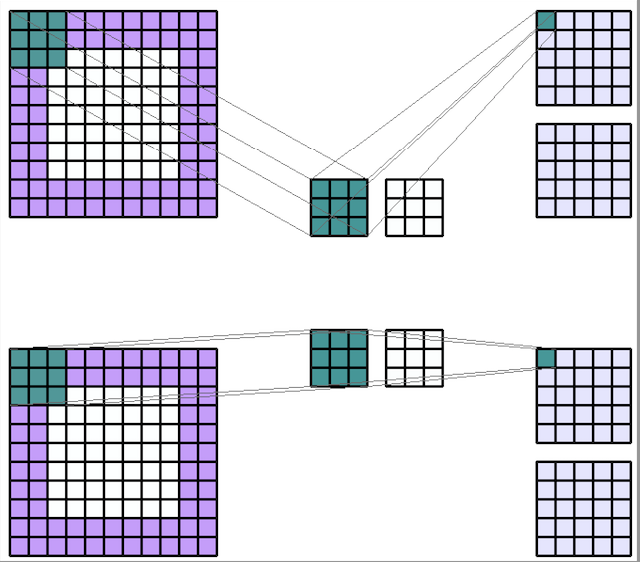

## `activation`

Тип: `string` или функции из `tf.keras.activations`.

Описание: функция активации, применяемая к каждому элементу в выходном тензоре слоя.

Примеры:<br>
• `activation = 'relu'`;<br>
• `activation = activations.relu` – аналог предыдущего варианта; <br>
• `activation = 'sigmoid'`;<br>
Список всех функций: `relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential`. Так же есть возможность кастомизации.

## `kernel_initializer` и `bias_initializer`

Тип: `string` или функции из `tf.keras.initializers`.

Описание: задание функции распределения случайных весов.
`kernel_initializer` – инициализация ядра.
`bias_initializer` – инициализация bias.
Выбор начальных весов может влиять на процесс обучения.

Примеры:<br>
• `kernel_initializer = 'glorot_uniform'` – инициализация Ксавье (по умолчанию);<br>
• `bias_initializer = 'zeros'` – инициализация нулями (по умолчанию);<br>
• `kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05)` – нормальное распределение нулевым средним и дисперсией 0.05 ;<br>
Список всех доступных инициализаторов: `RandomNormal, RandomUniform, TruncatedNormal, Zeros, Ones, GlorotNormal, GlorotUniform, Identity, Orthogonal, Constant, VarianceScaling`. Также есть возможность кастомизации.

## `kernel_regularizer`, `bias_regularizer`, `activity_regularizer`

Тип: `string` или функции из `tf.keras.regularizers`

Описание: регуляризатор позволяет применять штрафы к параметрам слоя или выходу функции активации слоя во время оптимизации. Эти штрафы суммируются в функции потерь, минимум которой ищется оптимизатором. Всего 3 варианта регуляризатора: $L_1$, $L_2$ и комбинированный.

Примеры:<br>
• `kernel_regularizer = 'l1'` – $L_1$-регуляризатор для весов ядра;<br>
• `kernel_regularizer = regularizers.l1(l1=0.01)` – аналогичен предыдущему, но с возможностью задавайть коэффециент регуляризации $l_1$;<br>
• `bias_regularizer = 'l2'` – $L_2$-регуляризатор для весов bias;<br>
• `activity_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)` – комбинированный регуляризатор для выхода слоя;<br>

Также есть возможность кастомизации.

#### Более подробный пример

Например, если мы задали для слоя свёртки регуляризацию $l_1$ и $l_2$ и задали среднеквадратичное отклонение $MSE$, то оптимизатор будет минимизировать выражение

$$MSE(y, pred) + \lambda_1 \cdot ||w_1||^2_1 + \lambda_2 \cdot ||w_2||^2_2$$
Здесь MSE – среднеквадратичная ошибка; <br>
$w_1$, $w_2$ – веса, для которых задана регуляризация $l_1$ и $l_2$ соответственно (или обе); <br>
$\lambda_1, \lambda_2$ – коэффециенты регуляризации (значения в Keras по умолчанию: `0.01`)
; <br>
То есть мы добавляем дополнительные члены для минимизации вместе с функцией ошибки. При такой постановке задачи оптимизатор будет стремиться **минимизировать** не только **ошибку**, но **и веса**. <br>
Еще можно смотреть на регуляризацию как на ограничение размера весов. То есть оптимизатор не позволяет приобретать весам большие значения.

## `kernel_constraint, bias_constraint`

Тип: `string` или функции из `tf.keras.constraints`

Описание: непосредственное ограничение весов. Ограничения класса constraints похожи на регуляризаторы regularizers. Они так же накладывают некоторые рамки на веса. Однако если регуляризаторы влияют на веса неявно (через минимизацию суммы с функцией ошибки), то constraints определяет явные ограничения.
Например, `constraints.NonNeg()` ограничивает веса неотрицательностью. То есть $W \geq 0, W$ – матрица весов ядер.

Примеры:<br>
• `kernel_constraint = 'non_neg'` – все веса ядер должны быть неотрицательными;<br>
• `kernel_constraint = constraints.NonNeg()` – аналогично предыдущему примеру;<br>
• `bias_constraint = constraints.MaxNorm(max_value=2, axis=0)` – норма bias не должна превышать 2;

Список возможных ограничений: `MaxNorm, MinMaxNorm, NonNeg, UnitNorm, RadialConstraint`. Также есть возможность кастомизации.